Business questions and concerns to answer with EDA: 

Are there any problems with the data? 
    Are there Null values? 
    Are there outliers? 
    Is the data sufficient? Sufficient for what kind of analysis?

Is the chemical composition of red and white wines comparable?

Does the chemical composition have any impact on the perceived quality of the wine? 
What are your observations? 


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [91]:
### Datasets ###

red_wine = pd.read_csv('/Users/tanchaud/CAB_Berlin/Project_2/Sprint_1/winequality-red.csv', sep=';')
white_wine =  pd.read_csv('/Users/tanchaud/CAB_Berlin/Project_2/Sprint_1/winequality-white.csv', sep= ';')



In [51]:
##### Feature Engineering #####

# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])

red_wine['wine_type'] = 'red'


# we are creating a new column called "quality_label", we define a range and associate that range with a label
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])

white_wine['wine_type'] = 'white'

## Exploratory Data Analysis ## 

In [53]:
## Combined Data ##

wines = pd.concat([red_wine, white_wine])
wines = wines.drop_duplicates()

# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

wines.tail()
print(wines.shape)

(5320, 14)


Text(0.5, 1.0, 'Wines')

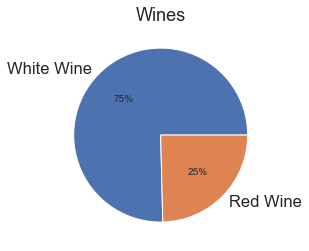

In [54]:
plt.pie(x=[white_wine.shape[0],red_wine.shape[0]], labels=['White Wine', 'Red Wine'], autopct = '%0.0f%%')
plt.savefig('wines_count.png', facecolor='w')
plt.title('Wines')

# Univariate Analysis # 

In [ ]:

# Explore the following: 
## 1. Does a feature differ across different groups? (show boxplots)
## 2. Show relationship between tro features of interest, that caught your eye during univariate analysis (scatter plots)

# 1. 
features = wines.select_dtypes(include=['float64']).columns

for feature in features: 

        fig = plt.figure()

        # Seaborn Aesthetics Settings 
        sns.set_theme()
        sns.set_context()
        
        fig.set_size_inches(10,7)
        sns.set(font_scale = 1.5)
        sns.boxplot(x=wines['wine_type'],y=wines[feature])
        
        plt.show()    


 

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

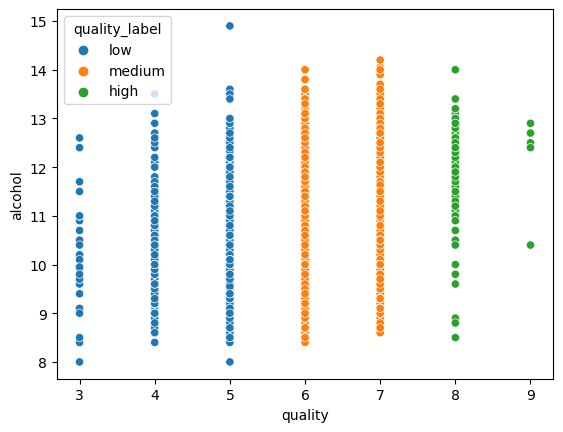

In [101]:
## 2. Exploring features of interest from univariate analysis 


sns.scatterplot(x=wines['quality'], y=wines['alcohol'], hue=wines['quality_label'])


In [58]:
correlation = wines['fixed acidity'].corr(wines['pH'])

correlation 

-0.27118180669645503

### Only alcohol appears to be differing significantly across different quality labels of wine, with high quality wine having the maximum alcohol content. The other features representing the physiochemical properties of wine, did not show any significant pattern across the different qualitiy labels of wine. However,....

### We have only analysed the relationship between one feature and the label. We still need to analyse the relationship between the label and the WHOLE feature set. For this we can use linear regression. 

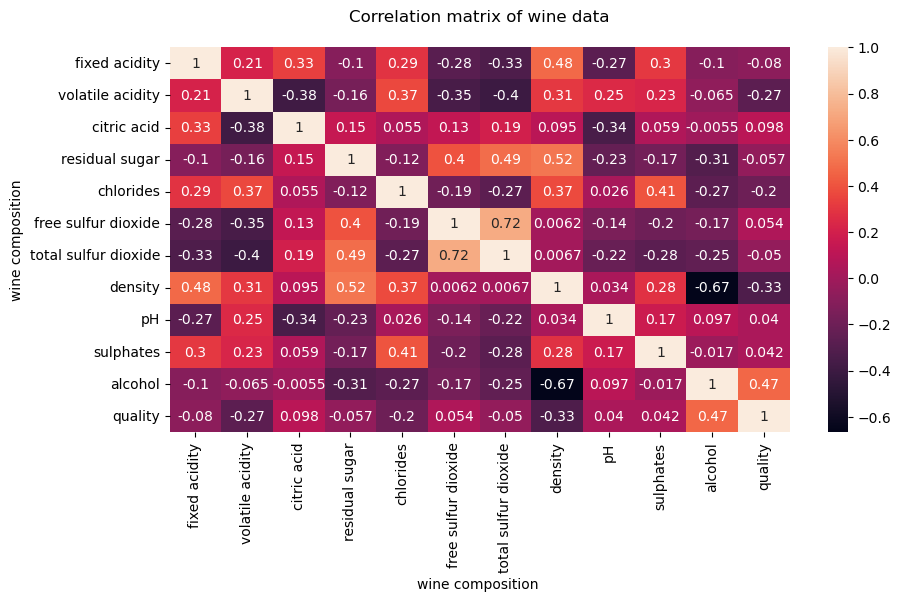

In [98]:
import matplotlib
matplotlib.style.use('default')

fig = plt.figure()
fig.set_size_inches(10,5)
hm = sns.heatmap(wines.corr(), annot = True)
hm.set(xlabel='wine composition ', ylabel='wine composition', title = "Correlation matrix of wine data\n")
plt.show()

# # High correlations 
# wines_corrmat = wines.corr()
# #wines_corrmat = abs(wines_corrmat)
# corr_with_quality = wines_corrmat['quality']
# corr_with_quality.sort_values(ascending=True)

# High correlaitons with target variable (quality), but not highly correlated with each other


#### There is a lot of negative correlation. Let's try to explore this further with linear regression. 

In [ ]:
# from sklearn import linear_model, metrics

# # defining feature matrix(X) and response vector(y)
# X = wines.select_dtypes(include=['float64'])
# y = wines['quality']

# # splitting X and y into training and testing sets
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
#                                                     random_state=1)

# # create linear regression object
# reg = linear_model.LinearRegression()

# # train the model using the training sets
# reg.fit(X_train, y_train)

# # regression coefficients
# print('Coefficients: ', reg.coef_)
 
# # variance score: 1 means perfect prediction
# print('Variance score: {}'.format(reg.score(X_test, y_test)))



In [ ]:
#wines_melt = pd.melt(wines.reset_index(), id_vars=['fixed acidity'], value_vars=['low','medium','high'])
wines.shape
#wines.columns
wines.iloc[:,:12]

In [ ]:
from scipy import stats
import scipy.stats

features = wines.select_dtypes(include=['float64']).columns

for feature in features: 

    # F and p values
    f_value, p_value = stats.f_oneway(wines[wines['quality_label'] == 'low'][feature],
    wines[wines['quality_label'] == 'medium'][feature],
    wines[wines['quality_label'] == 'high'][feature])
    #print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
    print(feature,' F Statistic:', f_value, '\tp-value:', p_value)

    # anova table as output
    import statsmodels.api as sm
    from statsmodels.formula.api import ols

    # Ordinary Least Squares (OLS) model
    X = wines.iloc[:,:12]
    y = wines['quality_label']
    X = sm.add_constant(X)
    model = ols(y,X).fit()
    anova_table = sm.stats.anova_lm(model, typ=1)
    anova_table

#print('Critical Value: ', scipy.stats.f.ppf(q=0.05,dfn=2,dfd=6494))



In [ ]:
X

In [ ]:
## Post-Hoc Test (Tukey's HSD) to see which labels differ #

from bioinfokit.analys import stat

res = stat()
res.tukey_hsd()

